### Data Collection
##### Sukumar Hakhoo 
##### Dibyajit Banerjee

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adadelta, Adam, Nadam
import matplotlib.pyplot as plt
from time import time
from IPython.display import clear_output
from itertools import accumulate

Loading dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('Training feature set shape: ' + str(x_train.shape))
print('Training label set shape: ' + str(y_train.shape))
print('Test feature set shape: ' + str(x_test.shape))
print('Test label set shape: ' + str(y_test.shape))

Training feature set shape: (50000, 32, 32, 3)
Training label set shape: (50000, 1)
Test feature set shape: (10000, 32, 32, 3)
Test label set shape: (10000, 1)


In [4]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [5]:
# Set numeric type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize feature values
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [6]:
class timer(Callback):
    def __init__(self):
        self.epoch_timings = []
        self.total_time_at_epochs = []
        self.training_time = 0
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time()
        
    def on_epoch_end(self, epoch, logs=None):
        self.epoch_timings.append(time() - self.epoch_start)
        
    def on_train_begin(self, logs=None):
        self.training_start = time()
        
    def on_train_end(self, logs=None):
        self.training_time = time() - self.training_start
        self.total_time_at_epochs = list(accumulate(self.epoch_timings))

In [7]:
def run_trainings(layers = None):
    results = {}
    
    for method in [32,64,128]:
        print(f'Training with Batch Size: {method}')
        results[method], t = {}, timer()
        model = Sequential(layers)
        model.compile(optimizer='RMSprop',
                      loss=CategoricalCrossentropy(),
                      metrics=['accuracy'])
        history = model.fit(
            x = x_train,
            y = y_train,
            batch_size = method,
            epochs = 25,
            validation_data = (x_test, y_test),
            verbose = 0,
            callbacks=[t]
        )

        results[method]['test_performance'] = model.evaluate(x=x_test, y=y_test)
        results[method]['accuracy'] = history.history['accuracy']
        results[method]['loss'] = history.history['loss']
        results[method]['total_time_at_epochs'] = t.total_time_at_epochs
        results[method]['training_time'] = t.training_time
        results[method]['epoch_timings'] = t.epoch_timings
        
        print('\n')
    
    return results

In [8]:
def visualize_training(results, opts='-', title='Adaptive Learning Rate Methods'):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
    fig.suptitle(title, fontsize=16)

    for method in results:
        ax[0].plot([None] + results[method]['accuracy'], opts, label=method)
    ax[0].legend(loc = 'best')
    ax[0].set_title('Training Accuracy per Epoch')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    #ax[0].set_ylim(0.2, 0.8)

    for method in results:
        ax[1].plot([None] + results[method]['loss'], opts, label=method)
    ax[1].legend(loc = 'best')
    ax[1].set_title('Training Loss per Epoch')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    #ax[1].set_ylim(1, 4.5)
    
    for method in results:
        ax[2].plot([None] + results[method]['total_time_at_epochs'], opts, label=method)
    ax[2].legend(loc = 'best')
    ax[2].set_title('Total Training Time at Epoch')
    ax[2].set_xlabel('Epoch')
    ax[2].set_ylabel('Training Time')
    # ax[2].set_ylim(-100, 950)

    for method in results:
        ax[3].plot([None] + results[method]['epoch_timings'], opts, label=method)
    ax[3].legend(loc = 'best')
    ax[3].set_title('Epoch Timing')
    ax[3].set_xlabel('Epoch')
    ax[3].set_ylabel('Training Time')
    # ax[2].set_ylim(-100, 950)

    fig.tight_layout()
    plt.show()

In [9]:
layers = [ 
    Flatten(input_shape=(32, 32, 3)),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(10, activation='softmax')
]

In [27]:
results = run_trainings(layers)

Training with Adagrad
63/63 [==============================] - 0s 3ms/step - loss: 4.3705 - accuracy: 0.3375


Training with RMSprop
63/63 [==============================] - 0s 3ms/step - loss: 1.9926 - accuracy: 0.3320




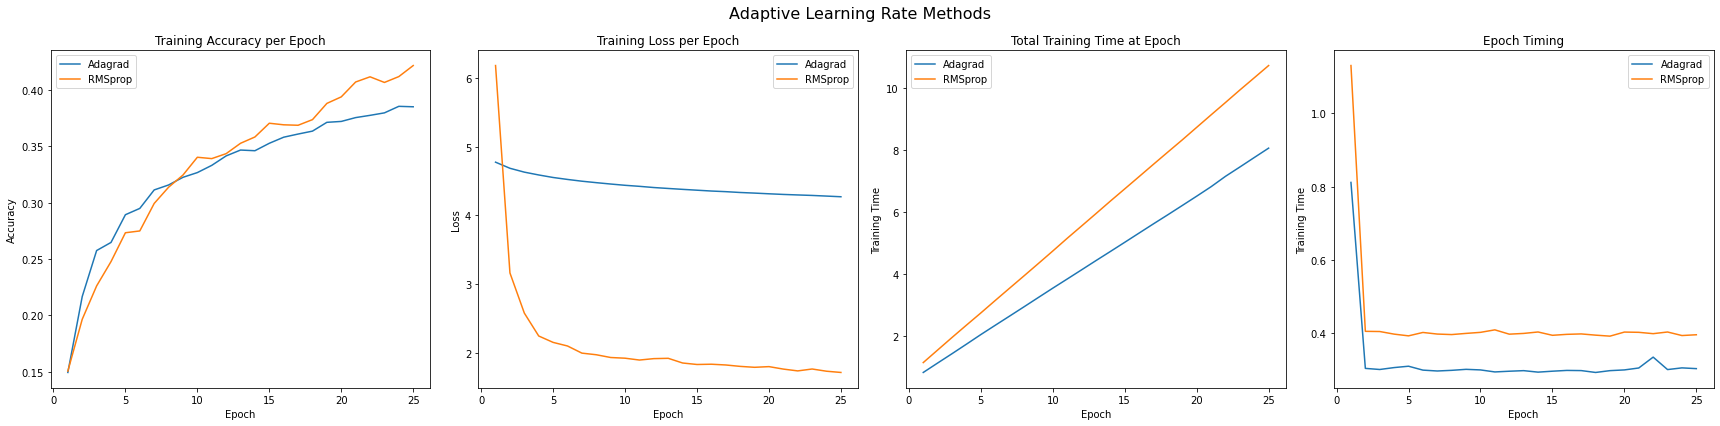

In [32]:
visualize_training(results)

In [10]:
results = run_trainings(layers)

Training with Batch Size: 32
63/63 [==============================] - 0s 3ms/step - loss: 2.0652 - accuracy: 0.3475


Training with Batch Size: 64
63/63 [==============================] - 0s 3ms/step - loss: 2.3763 - accuracy: 0.3620


Training with Batch Size: 128
63/63 [==============================] - 0s 3ms/step - loss: 2.6312 - accuracy: 0.3400




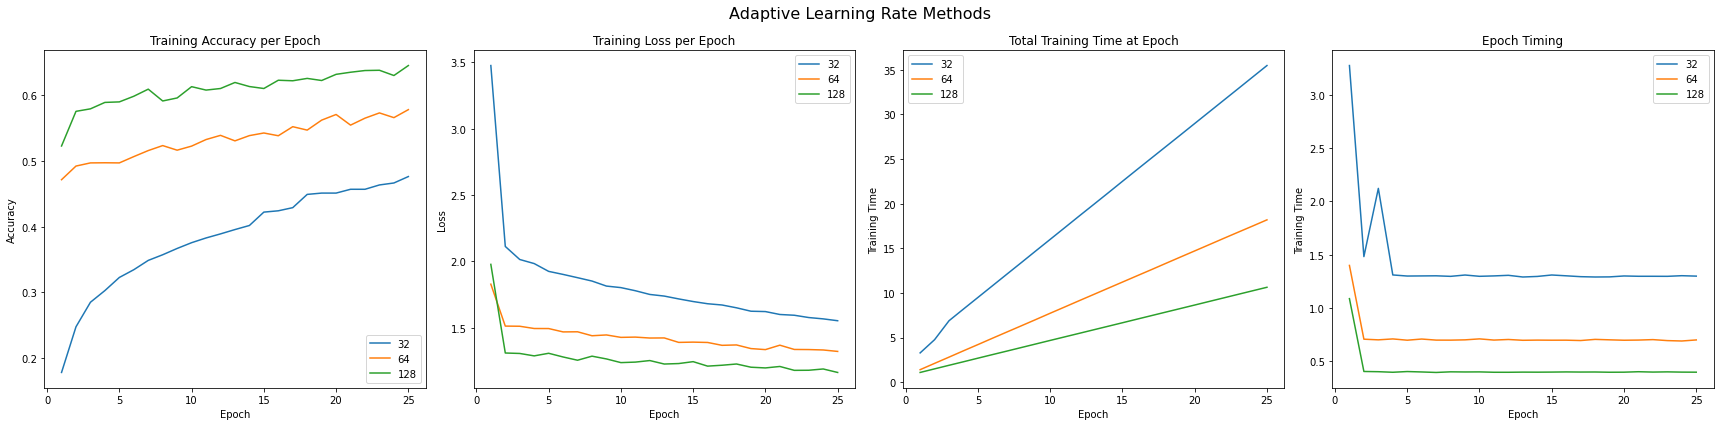

In [11]:
visualize_training(results)

In [1]:
from __future__ import print_function, division

import os
import copy
import pickle
import numpy as np
import pandas as pd
from pandas import DataFrame
from time import time
from math import floor
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import accumulate

import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.optim import lr_scheduler

import torchvision
from torchvision.utils import make_grid
from torchvision import datasets, models, transforms

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [2]:
## Check for GPU support
if torch.cuda.is_available():
    print('CUDA Toolkit available for PyTorch.\nDevice Name:')
    print(torch.cuda.get_device_name())
else:
    print('GPU Support not found for PyTorch')

CUDA Toolkit available for PyTorch.
Device Name:
GeForce GTX 1050 Ti


In [3]:
optimus_data = None
if os.path.exists('q4_data.pickle'):
    with open('q4_data.pickle', 'rb') as handle:
        optimus_data = pickle.load(handle)
        
if not optimus_data:
    print('Optimus data instantiated')
    optimus_data = { network: { } for network in ('Resnet18', 
                                                  'Resnet20', 
                                                  'Resnet32', 
                                                  'Resnet44', 
                                                  'Resnet56') }

Optimus data instantiated


In [4]:
# Training Configuration
config = {}
config['lr']=0.1
config['weight_decay']=1e-4
config['momentum']=0.9
config['batch_size']=128
config['gamma']=0.1
config['milestones'] = [100, 160, 220]

num_workers_on_gpu = 0

normalize = transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                 std=[x / 255.0 for x in [63.0, 62.1, 66.7]])

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize
])

test_transform = transforms.Compose([ 
    transforms.ToTensor(), 
    normalize 
])

In [5]:
train_data = datasets.CIFAR10(root='data/',
                              train=True,
                              transform=train_transform,
                              download=True)

Files already downloaded and verified


In [6]:
test_data = datasets.CIFAR10(root='data/',
                              train=False,
                              transform=test_transform,
                              download=True)

Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=config['batch_size'],
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=num_workers_on_gpu)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=config['batch_size'],
                                           shuffle=False,
                                           pin_memory=True,
                                           num_workers=num_workers_on_gpu)

In [8]:
def test(cnn, criterion, loader, epoch, model_name, gpu_name):
    xentropy_loss_avg_val = 0.
    cnn.eval()
    correct = 0.
    total = 0.
    for i, (images, labels) in enumerate(loader):
        images = images.cuda()
        labels = labels.cuda()

        with torch.no_grad():
            pred = cnn(images)
        
        xentropy_loss = criterion(pred, labels)
        xentropy_loss_avg_val += xentropy_loss.item() 
        
        pred = torch.max(pred.data, 1)[1]
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    
    optimus_data[model_name][gpu_name]['test_error'].append(xentropy_loss_avg_val / (i + 1))
    val_acc = correct / total
    cnn.train()
    return val_acc

In [9]:
def train(model, num_epochs, model_name, gpu_name, target_accuracy=None):
    if 'fc' in model.__dir__():
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, len(train_data.classes))
    cnn = model.cuda()
    criterion = nn.CrossEntropyLoss().cuda()
    cnn_optimizer = torch.optim.SGD(cnn.parameters(),
                                    lr=config['lr'],
                                    momentum=config['momentum'], 
                                    nesterov=True,
                                    weight_decay=config['weight_decay'])
    scheduler = lr_scheduler.MultiStepLR(cnn_optimizer, 
                                         config['milestones'], 
                                         gamma=config['gamma'])
    
    print_bound = 3
    print_output = True
    
    p = len(train_loader) // 60
    
    training_start_time = time()
    for epoch in range(num_epochs):
        epoch_start_time = time()
        
        if epoch < print_bound or epoch >= num_epochs - print_bound:
            print_output = True
        elif epoch == print_bound:
            print('.\n.\n.\n')
            print_output = False
               
        __print__ = ''
        __result__ =''
        print(' ' * 150, end='\r')
        if print_output:
            print('Epoch {}/{}'.format(epoch + 1, num_epochs))
            print('-' * 10)
        else:
            __print__ = 'Epoch {}/{}: '.format(epoch + 1, num_epochs)
            print(__print__, end='\r')

        xentropy_loss_avg = 0.
        correct = 0.
        total = 0.
        
        optimus_data[model_name][gpu_name]['epoch'][epoch + 1] = {
            'step_loss': [], 
            'step_loss_avg': [],
            'step_accuracy': []
        }

        for i, (images, labels) in enumerate(train_loader):
            
            if i % p == 0:
                __print__ += '#'
                print(__print__ + __result__, end='\r')

            images = images.cuda()
            labels = labels.cuda()

            cnn.zero_grad()
            pred = cnn(images)

            xentropy_loss = criterion(pred, labels)
            xentropy_loss.backward()
            cnn_optimizer.step()

            xentropy_loss_avg += xentropy_loss.item()

            # Calculate running average of accuracy
            pred = torch.max(pred.data, 1)[1]
            total += labels.size(0)
            correct += (pred == labels.data).sum().item()
            accuracy = correct / total

            __result__ = '    Loss=%.3f, Accuracy=%.2f' % (xentropy_loss_avg / (i + 1), accuracy*100) + '%'
            print(__print__ + __result__, end='\r')
            

        test_acc = test(cnn, criterion, test_loader, epoch, model_name, gpu_name)
        if print_output:
            print('\n')

        scheduler.step()

        optimus_data[model_name][gpu_name]['train_acc'].append(accuracy)
        optimus_data[model_name][gpu_name]['test_acc'].append(test_acc)
        optimus_data[model_name][gpu_name]['train_loss'].append(xentropy_loss_avg / (i + 1))
        
        if target_accuracy is not None:
            if accuracy > target_accuracy:
                print(' ' * 150, end='\r')
                print(f'\nTarget Accuracy of {target_accuracy * 100}% reached at {epoch + 1} epoch')
                print(f'Loss = {xentropy_loss_avg / (i + 1)}, Accuracy = {accuracy * 100}%')
                break
        
        optimus_data[model_name][gpu_name]['epoch_timings'].append(time() - epoch_start_time)
        
    optimus_data[model_name][gpu_name]['total_time_at_epochs'] = list(accumulate(optimus_data[model_name][gpu_name]['epoch_timings']))
    optimus_data[model_name][gpu_name]['total_training_time'] = time() - start_time

    # torch.save(cnn.state_dict(), 'model_state.pt')

In [ ]:
## Check for GPU support
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name()
    model_name = 'Resnet18'
    print(('#' * 40) + f'\n# {model_name} on GPU: {gpu_name} \n' + ('#' * 40))
    model = models.resnet18()
    optimus_data[model_name][gpu_name] = {'epoch': {},
                                          'train_acc': [],
                                          'test_acc': [],
                                          'train_loss': [],
                                          'test_error': [],
                                          'epoch_timings': []
                                         }
    train(model, 3, model_name, gpu_name)
    
    with open('q4_data.pickle', 'wb') as handle:
        pickle.dump(optimus_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('History saved\n')

In [ ]:
# Config
# data
# 

In [ ]:
class torch_trainer:
    
    def __init__(self, model, config):
        if torch.cuda.is_available():
            self.data_store = {'config': config,
                               'train_acc': [],
                               'test_acc': [],
                               'train_loss': [],
                               'test_error': [],
                               'epoch_timings': []
                              }
            # train(model, 3, model_name, gpu_name)
        else:
            print('GPU not found. Trainer not initialized.')
    
    def train(self):
        print(('#' * 40) + f'\n# {model_name} on GPU: {gpu_name} \n' + ('#' * 40))
        if 'fc' in model.__dir__():
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, len(train_data.classes))
        cnn = model.cuda()
        criterion = nn.CrossEntropyLoss().cuda()
        cnn_optimizer = torch.optim.SGD(cnn.parameters(),
                                        lr=config['lr'],
                                        momentum=config['momentum'], 
                                        nesterov=True,
                                        weight_decay=config['weight_decay'])
        scheduler = lr_scheduler.MultiStepLR(cnn_optimizer, 
                                             # list(map(lambda x: int(x), '60,80'.split(',')))
                                             config['milestones'], 
                                             gamma=config['gamma'])

        print_bound = 3
        print_output = True

        p = len(train_loader) // 60

        training_start_time = time()
        for epoch in range(num_epochs):
            epoch_start_time = time()

            if epoch < print_bound or epoch >= num_epochs - print_bound:
                print_output = True
            elif epoch == print_bound:
                print('.\n.\n.\n')
                print_output = False

            __print__ = ''
            __result__ =''
            print(' ' * 150, end='\r')
            if print_output:
                print('Epoch {}/{}'.format(epoch + 1, num_epochs))
                print('-' * 10)
            else:
                __print__ = 'Epoch {}/{}: '.format(epoch + 1, num_epochs)
                print(__print__, end='\r')

            xentropy_loss_avg = 0.
            correct = 0.
            total = 0.

            optimus_data[model_name][gpu_name]['epoch'][epoch + 1] = {
                'step_loss': [], 
                'step_loss_avg': [],
                'step_accuracy': []
            }

            for i, (images, labels) in enumerate(train_loader):

                if i % p == 0:
                    __print__ += '#'
                    print(__print__ + __result__, end='\r')

                images = images.cuda()
                labels = labels.cuda()

                cnn.zero_grad()
                pred = cnn(images)

                xentropy_loss = criterion(pred, labels)
                xentropy_loss.backward()
                cnn_optimizer.step()

                xentropy_loss_avg += xentropy_loss.item()

                # Calculate running average of accuracy
                pred = torch.max(pred.data, 1)[1]
                total += labels.size(0)
                correct += (pred == labels.data).sum().item()
                accuracy = correct / total

                __result__ = '    Loss=%.3f, Accuracy=%.2f' % (xentropy_loss_avg / (i + 1), accuracy*100) + '%'
                print(__print__ + __result__, end='\r')


            test_acc = test(cnn, criterion, test_loader, epoch, model_name, gpu_name)
            if print_output:
                print('\n')

            scheduler.step()

            optimus_data[model_name][gpu_name]['train_acc'].append(accuracy)
            optimus_data[model_name][gpu_name]['test_acc'].append(test_acc)
            optimus_data[model_name][gpu_name]['train_loss'].append(xentropy_loss_avg / (i + 1))

            if target_accuracy is not None:
                if accuracy > target_accuracy:
                    print(' ' * 150, end='\r')
                    print(f'\nTarget Accuracy of {target_accuracy * 100}% reached at {epoch + 1} epoch')
                    print(f'Loss = {xentropy_loss_avg / (i + 1)}, Accuracy = {accuracy * 100}%')
                    break

            optimus_data[model_name][gpu_name]['epoch_timings'].append(time() - epoch_start_time)

        optimus_data[model_name][gpu_name]['total_time_at_epochs'] = list(accumulate(optimus_data[model_name][gpu_name]['epoch_timings']))
        optimus_data[model_name][gpu_name]['total_training_time'] = time() - start_time
    
    def _test(self):
        pass
    
    def visualize_training(self):
        pass
    
    def _save_data(self):
        # Naming scheme: Model_GPU_{Distributed Strategy (NCCL)}_{config-index}.csv
        if config['is_distributed']:
            file_name = f'{config['model_name']}_{config['gpu']}_{config['distributed_strategy']}_{config['config_index']}.csv'
        else:
            file_name = f'{config['model_name']}_{config['gpu']}_{config['config_index']}.csv'
            
        saving_data = pd.DataFrame.from_dict(self.training_log)
        for key in self.config:
            saving_data[key] = config[key]
        saving_data.to_csv(file_name, index = True)
        saving_data.tail()
    

In [ ]:
config = {
    'config_index': 0,
    
    # model
    'model_name': '',
    'num_of_paramters': 0,
    'num_of_layers': 0,
    'model_type': 'cnn',
    
    
    # hardware
    'gpu': '',
    'is_distributed': False,
    'distributed_strategy': 'None',
    'num_of_nodes': 1,
    'num_of_gpus': 1
    
    # dataset
    'dataset': '',
    
    # hyper-parameters
    'batch_size': 32,
    'learning_rate': 0.01,
    'momentum': 0.9,
    'weight_decay': 1e-4,
    'gamma': 0.1,
    'milestones': '60,80',
    'lr_scheduler': '',
    'optimizer':'',
    'criterion': ''   
}


In [ ]:
config = {}
config['lr']=0.1
config['weight_decay']=1e-4
config['momentum']=0.9
config['batch_size']=128
config['gamma']=0.1
config['milestones'] = [100, 160, 220]

In [ ]:

no_params = sum(p.numel() for p in model.parameters())

In [ ]:
config = {
    'config_index': 0,
    
    # model
    'model_name': '',
    'num_of_paramters': 0,
    'num_of_layers': 0,
    'model_type': 'cnn',
    
    
    # hardware
    'gpu': '',
    'is_distributed': False,
    'distributed_strategy': 'None',
    'num_of_nodes': 1,
    'num_of_gpus': 1
    
    # dataset
    'dataset': '',
    
    # hyper-parameters
    'batch_size': 32,
    'learning_rate': 0.01,
    'momentum': 0.9,
    'weight_decay': 1e-4,
    'gamma': 0.1,
    'milestones': '60,80',
    'lr_scheduler': '',
    'optimizer':'',
    'criterion': ''   
}